## Robot@Home 2 - Laser Scanner observations `v1.2`

`R@H2 notebook series`   

<a href="https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/60-Lsrscan-observations.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>



### R@H2 functions introduced in this notebook:



-   `rh.get_laser_scan(id)`
-   `get_scan_xy(laser_scan)`
-   `plot_scan(laser_scan)`



### Initial requirements



Install Robot@Home2 Toolbox using the Python package manager



In [1]:
!pip install robotathome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 836 kB 5.1 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 


Check that the installation has been successful



In [2]:
import robotathome as rh
print (rh.__version__)

1.0.5


#### Using Google Colab and Google Drive



If you haven't yet mounted R@H2 Dataset public share on your Google Drive click
[this](https://drive.google.com/drive/folders/15fQwm4G3hHQR5vI9q0CVDlwxMwaJheC8?usp=sharing).

In order to access from Google Colab it's mandatory to create a `shorcut`. You
just need to select the shared folder `Shared with me > R@H2-2.0.1`, right click
and select the corresponding menu option `Add Shortcut to Drive`. Now, a new
folder (actually a shortcut) with the same name will appear under `My Drive`.

Next, mount Google Drive in Google Colab. The browser will ask for the
authorization to access the Google Drive account. Sign in to your Google account
and Google Drive will be mounted to `/content/drive`. Note that the R@H2 files are
located in the `/content/drive/MyDrive/R@H2-2.0.1` folder.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


More info in [this notebook](https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/05-Google-colab-drive.ipynb).



### Importing R@H2



In [4]:
%matplotlib inline

import numpy as np
import os
import pandas as pd

from robotathome import RobotAtHome
from robotathome import logger, log, set_log_level
from robotathome import time_win2unixepoch, time_unixepoch2win
from robotathome import get_labeled_img, plot_labeled_img, plot_scan, get_scan_xy

In [5]:
log.set_log_level('INFO')  # SUCCESS is the default

level_no, level_name = log.get_current_log_level()
print(f'Current log level name: {level_name}')

Current log level name: INFO


### Instantiating the toolbox



The toolbox is modeled around the RobotAtHome class, so we'll begin instantiating it and
creating a working object.

The RobotAtHome class has some attributes:

-   `rh_path` : string with the full path for robotathome database, usually `rh.db`.
    Its default value is `'.'` (the current directory)
-   `wspc_path` : string with the full path where results or temporary files are
    stored. It's the path to the workspace directory. Its default value also is
    `'.'`.
-   `db_filename` : string with the database filename. Its default value is `'rh.db'`
-   `rgbd_path` : string with the full path to where RGBD images are stored. Its default value is
    `'./files/rgbd'`.
-   `scene_path` : string with the full path to where Scene (3D) images are stored. Its
    default value is `'./files/scene'`.

We assume that we are running this notebook in Google Colab. Therefore our
folder structure is as follows:

    /content/drive
    └─── MyDrive
         ├─── R@H2-2.0.1
         │    └── files
         │        ├── rgbd
         │        └── scene
         └─────── rh.db

Let's instantiate our first, and usually the only one, object:



In [6]:
my_rh_path = '/content/drive/MyDrive/R@H2-2.0.1'
my_rgbd_path = os.path.join(my_rh_path, 'files/rgbd')
my_scene_path = os.path.join(my_rh_path, 'files/scene')
my_wspc_path = '/content'

try: 
      rh = RobotAtHome(my_rh_path, my_rgbd_path, my_scene_path, my_wspc_path)
except:
      logger.error("Something was wrong")

2022-06-05 11:04:39.878 | SUCCESS  | robotathome.core.reader:__open_dataset:85 - Connection is established: rh.db


Now you are ready to dive into the R@H2 database. Following we'll show a set of
functions to extract some of the main reference data.



### Laser scanner observations



In the previous notebook we have been dealing with RGBD observations. Now it is
the turn of the Laser Scanner observations.



In [7]:
# The full dataset is returned by default
laser_obs = rh.get_sensor_observations('lsrscan')
logger.info(f"# Laser Scans set: {len(laser_obs)} observations with {len(laser_obs.columns)} fields")

2022-06-05 11:04:46.972 | INFO     | __main__:<module>:3 - # Laser Scans set: 39363 observations with 14 fields


Apart from the information included in each record,



In [8]:
laser_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39363 entries, 0 to 39362
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  39363 non-null  int64  
 1   timestamp           39363 non-null  int64  
 2   home_session_id     39363 non-null  int64  
 3   home_subsession_id  39363 non-null  int64  
 4   home_id             39363 non-null  int64  
 5   room_id             39363 non-null  int64  
 6   sensor_id           39363 non-null  int64  
 7   sensor_name         39363 non-null  object 
 8   sensor_pose_x       39363 non-null  float64
 9   sensor_pose_y       39363 non-null  float64
 10  sensor_pose_z       39363 non-null  float64
 11  sensor_pose_yaw     39363 non-null  float64
 12  sensor_pose_pitch   39363 non-null  float64
 13  sensor_pose_roll    39363 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 4.2+ MB


you can get the laser scan corresponding to the observation



In [9]:
# For example, let's examine the first laser observation
id = 200000
laser_scan = rh.get_laser_scan(id)
laser_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     682 non-null    int64  
 1   shot_id                682 non-null    int64  
 2   scan                   682 non-null    float64
 3   valid_scan             682 non-null    int64  
 4   sensor_observation_id  682 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 26.8 KB


The data frame for a laser observation,.i.e. for a given `id`, has 682 rows, one per
shot. Each shot is referenced by the shot<sub>id</sub> field whose values are in the range
[0, 681] and are sequentially ordered.

Note the other important fields, `scan` which is the distance measurement and
`valid_scan` which is a binary value indicating whether the shot is valid (1) or
not (0).



In [10]:
# To get a list with the shot values
# We can easily convert a column to a list
shot_list = laser_scan['scan'].values.tolist()
logger.info("\nShots column: \n{}\nShot list: \n{}...", laser_scan['scan'], shot_list[:5])

2022-06-05 11:05:22.360 | INFO     | __main__:<module>:4 - 
Shots column: 
0      1.788
1      1.749
2      1.749
3      1.749
4      1.749
       ...  
677    1.099
678    1.099
679    0.539
680    0.537
681    0.531
Name: scan, Length: 682, dtype: float64
Shot list: 
[1.788, 1.749, 1.749, 1.749, 1.749]...


The laser scan dataframe has also important metadada that can be printed out



In [11]:
logger.info("\naperture    : {} radians \nmax_range   : {} meters\nno_of_shots : {}",
            laser_scan.aperture, laser_scan.max_range, laser_scan.no_of_shots )

2022-06-05 11:05:27.389 | INFO     | __main__:<module>:2 - 
aperture    : 4.1847 radians 
max_range   : 5.6 meters
no_of_shots : 682


So a distance measurement is done `no_of_shot` times with an angular distance of
`aperture/no_of_shots` radians between them.

Those parameters allow to easily compute x, y coordinates, nevertheless there is
a function to get them



In [12]:
xy = get_scan_xy(laser_scan)
logger.info("\n (x,y) laser scan coordinates: \n{}", xy)

2022-06-05 11:05:31.082 | INFO     | __main__:<module>:2 - 
 (x,y) laser scan coordinates: 
                x         y
shot_id                    
0        1.788000  0.000000
1        1.748967  0.010732
2        1.748868  0.021463
3        1.748704  0.032193
4        1.748473  0.042923
...           ...       ...
677     -0.582254 -0.932084
678     -0.576524 -0.935640
679     -0.279933 -0.460607
680     -0.276073 -0.460600
681     -0.270189 -0.457120

[682 rows x 2 columns]


Finally you can plot the scan



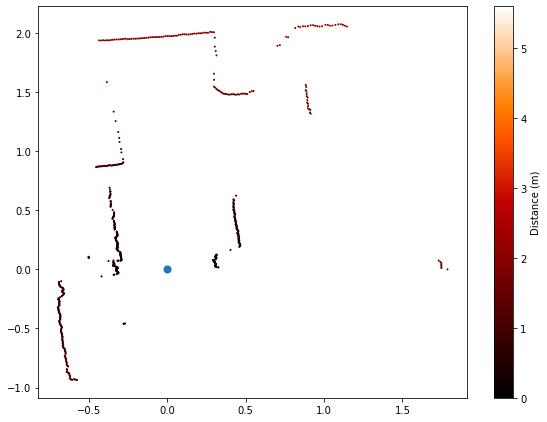

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.6, 7.2]
plot_scan(laser_scan)

<a href="https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/60-Lsrscan-observations.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

